### 1 - Loading Dataset

If you dont have tf-idf-dataset.json you must run tf-idf-processing.ipynb first

In [33]:
import json
import numpy as np

from sklearn.model_selection import train_test_split


# loading dataset
dataset = json.load(open("Dataset/tf-idf-dataset.json", "r"))

X = []
y = []
classes = dataset["ClassNames"]

# extracting X and y from json dataset
for data in dataset["Dataset"]:
    X.append(data["x"])
    y.append(data["y"])

print(f"total dataset length: {len(X)}")

X = np.array(X)
y = np.array(y)

# spliting dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(x_train.shape)
print(y_train.shape)

total dataset length: 42663
(29864, 5000)
(29864, 8)


### 2 - Models (Tests)

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Plotting training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

#### 2.1 - Simple DNN

Epoch 1/10
234/234 [==============================] - 2s 8ms/step - loss: 0.8593 - accuracy: 0.8249 - val_loss: 0.4265 - val_accuracy: 0.8651
Epoch 2/10
234/234 [==============================] - 2s 7ms/step - loss: 0.3505 - accuracy: 0.8844 - val_loss: 0.3596 - val_accuracy: 0.8755
Epoch 3/10
234/234 [==============================] - 2s 6ms/step - loss: 0.2734 - accuracy: 0.9075 - val_loss: 0.3414 - val_accuracy: 0.8778
Epoch 4/10
234/234 [==============================] - 1s 6ms/step - loss: 0.2241 - accuracy: 0.9254 - val_loss: 0.3421 - val_accuracy: 0.8773
Epoch 5/10
234/234 [==============================] - 1s 6ms/step - loss: 0.1883 - accuracy: 0.9385 - val_loss: 0.3490 - val_accuracy: 0.8741
Epoch 6/10
234/234 [==============================] - 1s 6ms/step - loss: 0.1588 - accuracy: 0.9497 - val_loss: 0.3574 - val_accuracy: 0.8745
Epoch 7/10
234/234 [==============================] - 1s 6ms/step - loss: 0.1349 - accuracy: 0.9602 - val_loss: 0.3731 - val_accuracy: 0.8709
Epoch 

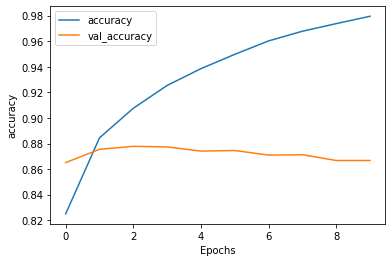

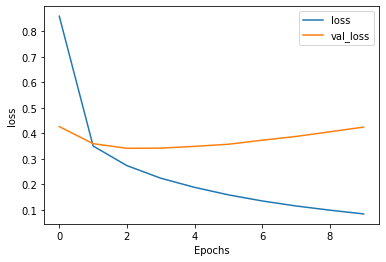

In [35]:
model_1 =  tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(5000,), activation="relu"),
    tf.keras.layers.Dense(len(classes), activation="softmax")
])

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_1.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=10, verbose=1)

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

del model_1


Training accuracy is good but val_accuracy too low it means model overfitted to training set
But i am impressed this little neural network has %97 acc

#### 2.2 - More Bigger DNN

Epoch 1/10
234/234 [==============================] - 3s 10ms/step - loss: 0.5049 - accuracy: 0.8361 - val_loss: 0.3532 - val_accuracy: 0.8762
Epoch 2/10
234/234 [==============================] - 2s 8ms/step - loss: 0.2044 - accuracy: 0.9280 - val_loss: 0.3993 - val_accuracy: 0.8648
Epoch 3/10
234/234 [==============================] - 2s 8ms/step - loss: 0.0976 - accuracy: 0.9667 - val_loss: 0.5121 - val_accuracy: 0.8557
Epoch 4/10
234/234 [==============================] - 2s 8ms/step - loss: 0.0459 - accuracy: 0.9853 - val_loss: 0.6005 - val_accuracy: 0.8606
Epoch 5/10
234/234 [==============================] - 2s 8ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.6980 - val_accuracy: 0.8668
Epoch 6/10
234/234 [==============================] - 2s 8ms/step - loss: 0.0171 - accuracy: 0.9939 - val_loss: 0.7695 - val_accuracy: 0.8621
Epoch 7/10
234/234 [==============================] - 2s 8ms/step - loss: 0.0139 - accuracy: 0.9947 - val_loss: 0.7706 - val_accuracy: 0.8638
Epoch

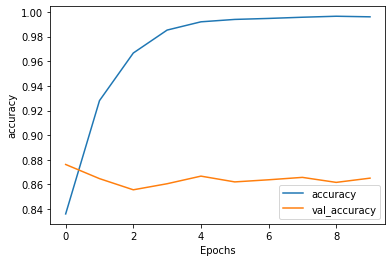

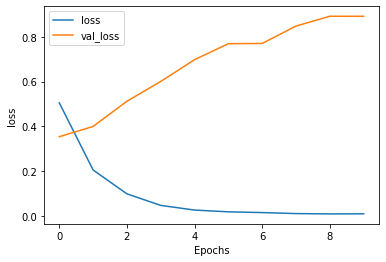

In [38]:
model_2 =  tf.keras.Sequential([
    tf.keras.layers.Dense(1000, input_shape=(5000,), activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(len(classes), activation="softmax")
])

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_2.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=10, verbose=1)

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Training accuracy is more good than model 1 but it is still overfitting to traing set

### 1.1.3 - DNN with Droput

Epoch 1/10
234/234 [==============================] - 3s 10ms/step - loss: 0.6591 - accuracy: 0.7840 - val_loss: 0.3575 - val_accuracy: 0.8794
Epoch 2/10
234/234 [==============================] - 2s 9ms/step - loss: 0.2911 - accuracy: 0.9060 - val_loss: 0.3694 - val_accuracy: 0.8755
Epoch 3/10
234/234 [==============================] - 2s 8ms/step - loss: 0.1875 - accuracy: 0.9377 - val_loss: 0.4008 - val_accuracy: 0.8737
Epoch 4/10
234/234 [==============================] - 2s 8ms/step - loss: 0.1185 - accuracy: 0.9617 - val_loss: 0.4671 - val_accuracy: 0.8694
Epoch 5/10
234/234 [==============================] - 2s 9ms/step - loss: 0.0743 - accuracy: 0.9759 - val_loss: 0.5487 - val_accuracy: 0.8707
Epoch 6/10
234/234 [==============================] - 2s 8ms/step - loss: 0.0534 - accuracy: 0.9830 - val_loss: 0.6227 - val_accuracy: 0.8701
Epoch 7/10
234/234 [==============================] - 2s 9ms/step - loss: 0.0438 - accuracy: 0.9861 - val_loss: 0.6239 - val_accuracy: 0.8705
Epoch

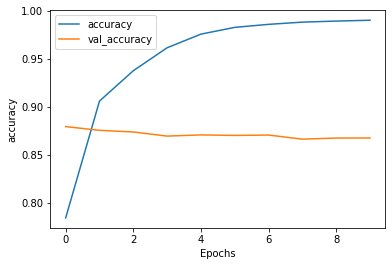

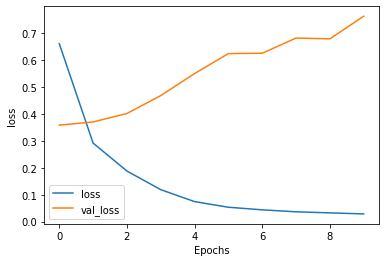

In [37]:
model_3 =  tf.keras.Sequential([

    tf.keras.layers.Dense(1000, input_shape=(5000,), activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(classes), activation="softmax")
])

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_3.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=10, verbose=1)

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

del model_3


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# getting y_red for x_test i want to see test set precission, classification_report and confusion_matrix
y_pred = model.predict(x_test, batch_size=128)
y_pred_1d = y_pred.argmax(1)
y_test_1d = y_test.argmax(1)

print(f"{classification_report(y_pred_1d, y_test_1d, target_names=classes)}")

              precision    recall  f1-score   support

  Automobile       0.94      0.94      0.94      1603
      Living       0.68      0.75      0.71      1459
      Health       0.88      0.87      0.87      1605
       Daily       0.79      0.71      0.75      1808
       Sport       0.94      0.93      0.94      1605
  Technology       0.91      0.93      0.92      1543
     Economy       0.85      0.87      0.86      1575
    Magazine       0.95      0.94      0.94      1601

    accuracy                           0.87     12799
   macro avg       0.87      0.87      0.87     12799
weighted avg       0.87      0.87      0.87     12799



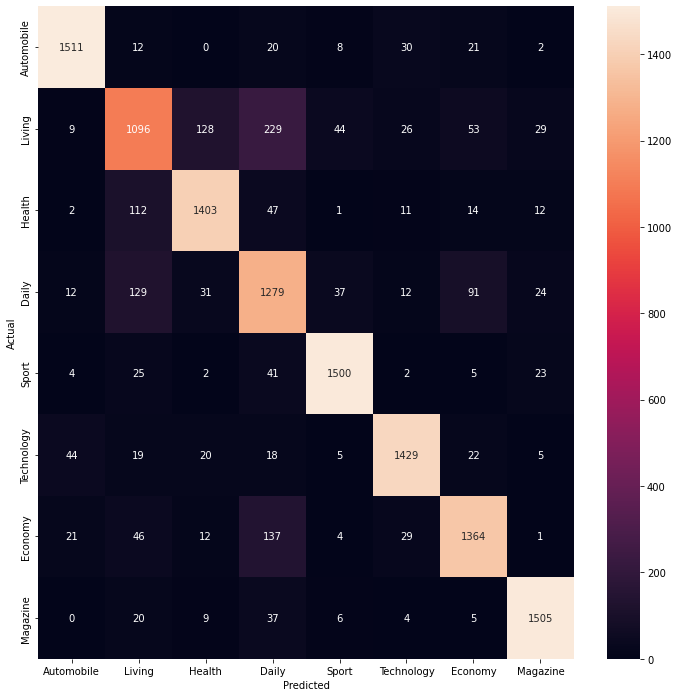

In [43]:
import pandas as pd
import seaborn as sn

confusion_matrix = pd.crosstab(y_test_1d, y_pred_1d, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 12)) # for more bigger plot
sn.heatmap(confusion_matrix, annot=True, xticklabels=classes, yticklabels=classes, fmt='g')
plt.show()


In [ ]:
# saving model for api usage
model.save(f"Models/keras_ann_v1.h5")

My conclusion is living, health and daily classes has more similar content and this reason it makes lower accuracy.
If you will look at precision and recall you will see model living hard times to trust prediction on Daily class
Also i analysed Daily Class myself and it has more news variation than others.
As you can understand living and health has relation between them and it is makes hard to classify